In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("DataSets/bank.csv")
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4023,47,6,1,2,0,1011,0,0,0,6,10,808,1,-1,0,3,1
8031,29,4,1,2,0,-6,1,0,2,9,8,324,1,-1,0,3,0
9048,44,7,1,1,0,808,1,0,2,2,6,67,2,-1,0,3,0
1125,36,0,1,1,0,96,0,0,0,2,3,302,1,-1,0,3,1
5128,52,7,0,1,0,36,1,1,0,11,8,930,1,-1,0,3,1


# EDA

<AxesSubplot:xlabel='marital', ylabel='age'>

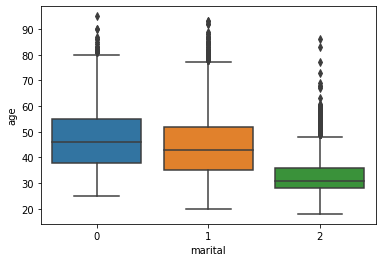

In [3]:
sns.boxplot(x=df.marital,y=df.age)

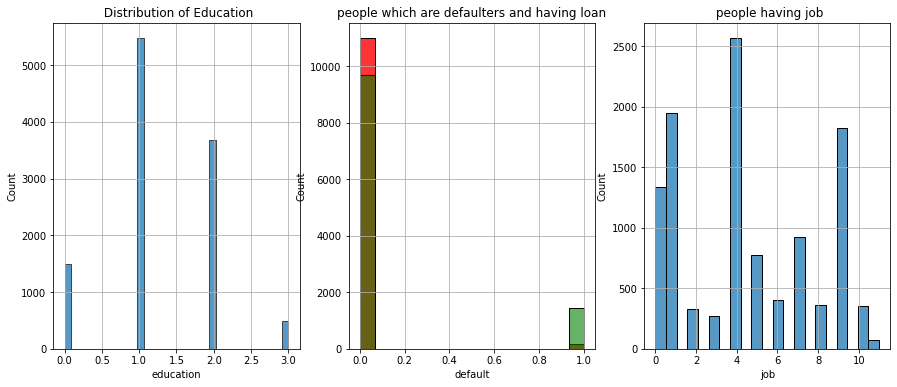

In [4]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.title(" Distribution of Education")
sns.histplot(df.education)   # Distribution of Education
plt.grid()


plt.subplot(1,3,2)
plt.title("people which are defaulters and having loan")
sns.histplot(df.default,color="r",alpha=0.8)    # Ratio of Defaulters
sns.histplot(df.loan,color='g',alpha=0.6)       # people which are defaulters and having loan
plt.grid()


plt.subplot(1,3,3)
plt.title(" people having job")
sns.histplot(df.job)   # Distribution of job
plt.grid()

plt.show()

0    5873
1    5289
Name: deposit, dtype: int64


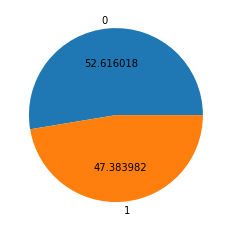

In [5]:
# Data is almost balanced
print(df.deposit.value_counts())
plt.pie(df.deposit.value_counts(),labels=[0,1],autopct="%2f")
plt.show()

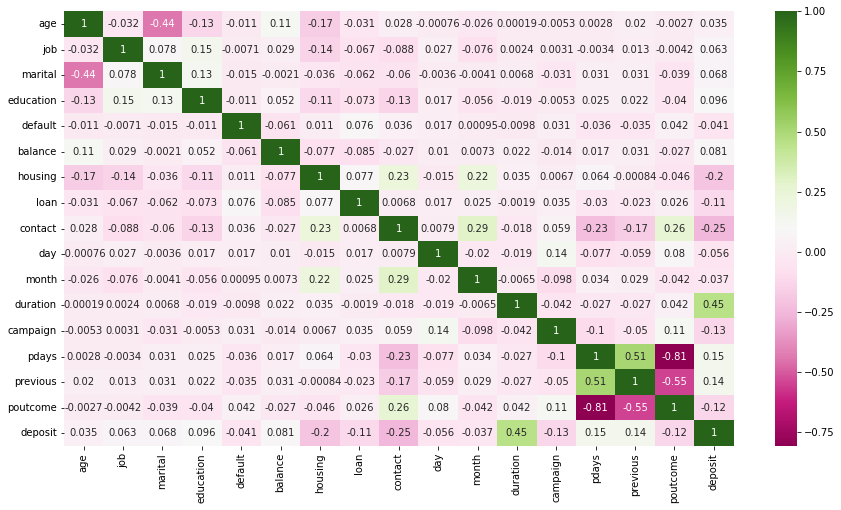

In [6]:
# poutcome & pdays are highly negaively correlated with each other
# poutcome & previous are negaively correlated with each other

# previous & pdays are positively correlated with each other
# duration & deposits are slightly correlated with each other


plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap="PiYG",annot=True)
plt.show()

# Splitting

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X = df.iloc[:,:-1]
X = ss.fit_transform(X)
X

array([[ 1.49150488, -1.39160402, -0.31867191, ..., -0.48118405,
        -0.36325984,  0.52070456],
       [ 1.23967567, -1.39160402, -0.31867191, ..., -0.48118405,
        -0.36325984,  0.52070456],
       [-0.0194704 ,  1.39910458, -0.31867191, ..., -0.48118405,
        -0.36325984,  0.52070456],
       ...,
       [-0.77495804,  1.39910458,  1.27998692, ..., -0.48118405,
        -0.36325984,  0.52070456],
       [ 0.14841574,  1.39910458, -0.31867191, ...,  1.10957066,
         1.81833188, -2.47059976],
       [-0.6070719 ,  1.39910458, -0.31867191, ..., -0.48118405,
        -0.36325984,  0.52070456]])

In [8]:
Y = df.deposit
Y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

# Modelling

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
RF = RandomForestClassifier()

def Mymodel(model):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)

    print (classification_report(Y_test,Y_pred))

In [11]:
Mymodel(RF)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.81      0.87      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.85      0.84      0.84      3349



# Hypertuning

# Criterion → entropy

In [12]:
RF_Entropy = RandomForestClassifier(criterion="entropy")
Mymodel(RF_Entropy)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.81      0.87      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.85      0.85      0.84      3349
weighted avg       0.85      0.84      0.84      3349



### E_Max_depth


In [13]:
E_MAX_DEPTH = []
for i in range(1,31):
    model = RandomForestClassifier(max_depth=i,criterion="entropy")
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    E_MAX_DEPTH.append(accuracy_score(Y_test,Y_pred))
    
E_MAX_DEPTH_DF = pd.DataFrame(data=E_MAX_DEPTH,index=np.arange(1,31),columns=['Accuracy_score'])

### E_Min_sample_split


In [14]:
E_MIN_SAMPLE_SPLIT = [np.NAN,np.NAN]
for i in range(2,31):
    model = RandomForestClassifier(min_samples_split=i,criterion="entropy")
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    E_MIN_SAMPLE_SPLIT.append(accuracy_score(Y_test,Y_pred))
    
E_MIN_SAMPLE_SPLIT_DF = pd.DataFrame(data=E_MIN_SAMPLE_SPLIT,index=np.arange(0,31),columns=['Accuracy_score'])

### E_Min_sample_leaf

In [15]:
E_MIN_SAMPLE_LEAF = [np.NAN,np.NAN]
for i in range(2,31):
    model = RandomForestClassifier(min_samples_leaf=i,criterion="entropy")
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    E_MIN_SAMPLE_LEAF.append(accuracy_score(Y_test,Y_pred))
    
E_MIN_SAMPLE_LEAF_DF = pd.DataFrame(data=E_MIN_SAMPLE_LEAF,index=np.arange(0,31),columns=['Accuracy_score'])

# Plotting Graph for all using ENTROPY

max_depth     Accuracy_score
22        0.851597
----------------------------
min_sample_leaf    Accuracy_score
2        0.847417
----------------------------
min_sample_split    Accuracy_score
5        0.850105


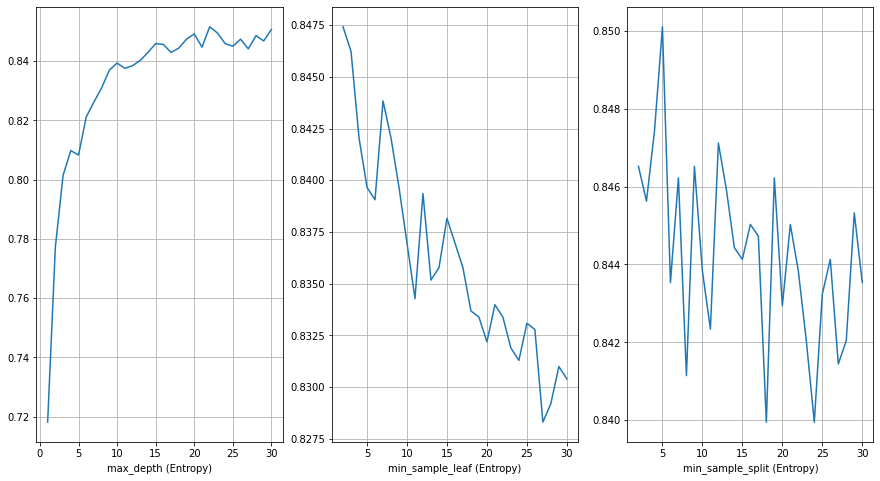

In [16]:
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
plt.plot(E_MAX_DEPTH_DF)
plt.xlabel("max_depth (Entropy)")
plt.grid()
print("max_depth",E_MAX_DEPTH_DF[E_MAX_DEPTH_DF.Accuracy_score == E_MAX_DEPTH_DF.Accuracy_score.max()])
print("----------------------------")

plt.subplot(1,3,2)
plt.plot(E_MIN_SAMPLE_LEAF_DF)
plt.xlabel("min_sample_leaf (Entropy)")
plt.grid()
print("min_sample_leaf",E_MIN_SAMPLE_LEAF_DF[E_MIN_SAMPLE_LEAF_DF.Accuracy_score == E_MIN_SAMPLE_LEAF_DF.Accuracy_score.max()])
print("----------------------------")

plt.subplot(1,3,3)
plt.plot(E_MIN_SAMPLE_SPLIT)
plt.xlabel("min_sample_split (Entropy)")
plt.grid()
print("min_sample_split",E_MIN_SAMPLE_SPLIT_DF[E_MIN_SAMPLE_SPLIT_DF.Accuracy_score == E_MIN_SAMPLE_SPLIT_DF.Accuracy_score.max()])

# Criterion → GINI

### G_Max_depth


In [17]:
G_MAX_DEPTH = []
for i in range(1,31):
    model = RandomForestClassifier(max_depth=i)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    G_MAX_DEPTH.append(accuracy_score(Y_test,Y_pred))
    
G_MAX_DEPTH_DF = pd.DataFrame(data=G_MAX_DEPTH,index=np.arange(1,31),columns=['Accuracy_score'])

### G_Min_sample_leaf

In [18]:
G_MIN_SAMPLE_SPLIT = [np.NAN,np.NAN]
for i in range(2,31):
    model = RandomForestClassifier(min_samples_split=i)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    G_MIN_SAMPLE_SPLIT.append(accuracy_score(Y_test,Y_pred))
    
G_MIN_SAMPLE_SPLIT_DF = pd.DataFrame(data=G_MIN_SAMPLE_SPLIT,index=np.arange(0,31),columns=['Accuracy_score'])

### G_Min_sample_split

In [19]:
G_MIN_SAMPLE_LEAF = [np.NAN,np.NAN]
for i in range(2,31):
    model = RandomForestClassifier(min_samples_leaf=i)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    G_MIN_SAMPLE_LEAF.append(accuracy_score(Y_test,Y_pred))
    
G_MIN_SAMPLE_LEAF_DF = pd.DataFrame(data=G_MIN_SAMPLE_LEAF,index=np.arange(0,31),columns=['Accuracy_score'])

# Plotting Graph for all using GINI

max_depth     Accuracy_score
22        0.849806
----------------------------
min_sample_leaf    Accuracy_score
2        0.842938
----------------------------
min_sample_split    Accuracy_score
9         0.84891


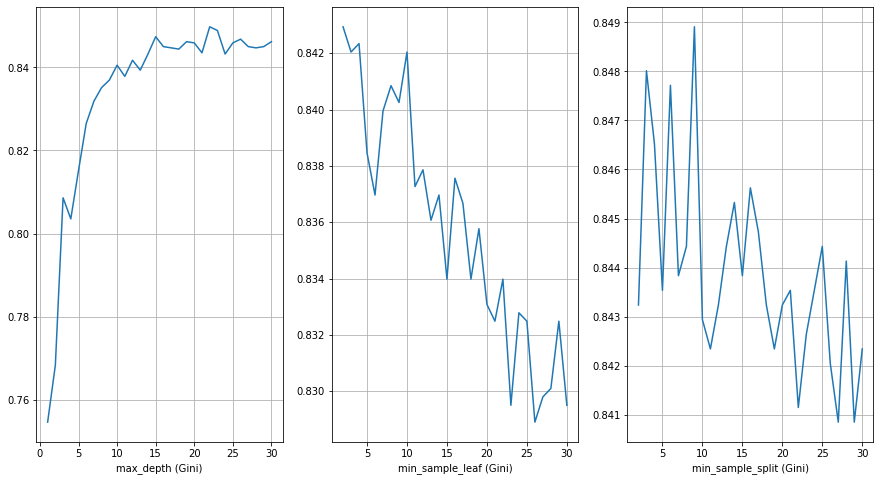

In [20]:
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
plt.plot(G_MAX_DEPTH_DF)
plt.xlabel("max_depth (Gini)")
plt.grid()
print("max_depth",G_MAX_DEPTH_DF[G_MAX_DEPTH_DF.Accuracy_score == G_MAX_DEPTH_DF.Accuracy_score.max()])
print("----------------------------")

plt.subplot(1,3,2)
plt.plot(G_MIN_SAMPLE_LEAF_DF)
plt.xlabel("min_sample_leaf (Gini)")
plt.grid()
print("min_sample_leaf",G_MIN_SAMPLE_LEAF_DF[G_MIN_SAMPLE_LEAF_DF.Accuracy_score == G_MIN_SAMPLE_LEAF_DF.Accuracy_score.max()])
print("----------------------------")

plt.subplot(1,3,3)
plt.plot(G_MIN_SAMPLE_SPLIT)
plt.xlabel("min_sample_split (Gini)")
plt.grid()
print("min_sample_split",G_MIN_SAMPLE_SPLIT_DF[G_MIN_SAMPLE_SPLIT_DF.Accuracy_score == G_MIN_SAMPLE_SPLIT_DF.Accuracy_score.max()])

In [21]:
# from sklearn.model_selection import GridSearchCV

# RFC = RandomForestClassifier()
# params = {"criterion":("gini","entropy"),
#          "max_depth":np.arange(15,26),
#           "min_samples_split":(2,3,4,5,10,11,12,13,14),
#           "min_samples_leaf":(1,2,3,4,5), 
#          }


# gscv = GridSearchCV(RFC,params,verbose = 3)
# gscv.fit(X_train,Y_train)